In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from IPython.display import display_html 

In [2]:
from metadata_utils import get_metadata, get_tuned_alg_perf, process_metafeatures, compute_feature_corrs

## Read Meta-dataset and dataset meta-features

In [5]:
dataset_version = "_v1"
# For choosing metafeatures
filter_families = [
    'general',
    'statistical',
    'info-theory']

In [6]:
metadataset_df, metafeatures_df = get_metadata(dataset_version)

metafeatures_processed = process_metafeatures(metafeatures_df, filter_families=filter_families)
metafeatures_df = metafeatures_processed

In [7]:
metafeatures_df.head()

,dataset_name,f__pymfe.general.attr_to_inst,f__pymfe.general.cat_to_num,f__pymfe.general.freq_class.count,f__pymfe.general.freq_class.histogram.0,f__pymfe.general.freq_class.histogram.1,f__pymfe.general.freq_class.histogram.2,f__pymfe.general.freq_class.histogram.3,f__pymfe.general.freq_class.histogram.4,f__pymfe.general.freq_class.histogram.5,...,f__pymfe.info-theory.mut_inf.quantiles.1,f__pymfe.info-theory.mut_inf.quantiles.2,f__pymfe.info-theory.mut_inf.quantiles.3,f__pymfe.info-theory.mut_inf.quantiles.4,f__pymfe.info-theory.mut_inf.range,f__pymfe.info-theory.mut_inf.sd,f__pymfe.info-theory.mut_inf.skewness,f__pymfe.info-theory.ns_ratio,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
0,openml__pc4__3902__fold_0,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
1,openml__pc4__3902__fold_1,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
2,openml__pc4__3902__fold_2,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
3,openml__pc4__3902__fold_3,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
4,openml__pc4__3902__fold_4,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN


## Feature correlations

In [23]:
metric = "F1" # Choices: "Accuracy", "F1", "Log Loss"

In [24]:
tuned_alg_perf = get_tuned_alg_perf(metadataset_df, metric=metric)
tuned_alg_perf

,results_bucket_path,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,trial_number,alg_hparam_id,exp_name,time__train,...,AUC__test,Accuracy__test,F1__test,time__train-eval,MSE__train,R2__train,MSE__val,R2__val,MSE__test,R2__test
20.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_27_s0,27,CatBoost__seed_0__trial_27,gpu-expt-a_091822_065111_fdd9.zip,5.285700,...,0.990643,0.994211,0.994211,0.146698,NaN,NaN,NaN,NaN,NaN,NaN
252.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_1,openml__APSFailure__168868,binary,CatBoost,random_3_s0,3,CatBoost__seed_0__trial_3,gpu-expt-a_091822_065111_fdd9.zip,3.450149,...,0.988862,0.992105,0.992105,0.140466,NaN,NaN,NaN,NaN,NaN,NaN
486.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_2,openml__APSFailure__168868,binary,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,11.938921,...,0.995551,0.993421,0.993421,0.173912,NaN,NaN,NaN,NaN,NaN,NaN
700.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_3,openml__APSFailure__168868,binary,CatBoost,random_20_s0,20,CatBoost__seed_0__trial_20,gpu-expt-a_091822_065111_fdd9.zip,7.538957,...,0.991612,0.994868,0.994868,0.179523,NaN,NaN,NaN,NaN,NaN,NaN
944.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_4,openml__APSFailure__168868,binary,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,11.805938,...,0.989614,0.995658,0.995658,0.179625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324078.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_5,openml__wilt__146820,binary,XGBoost,default,0,XGBoost__seed_0__trial_0,gpu-expt-a_091722_220903_21b9.zip,0.142135,...,0.955786,0.983471,0.983471,0.006239,NaN,NaN,NaN,NaN,NaN,NaN
324421.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_6,openml__wilt__146820,binary,XGBoost,random_22_s0,22,XGBoost__seed_0__trial_22,gpu-expt-a_091722_220903_21b9.zip,0.116242,...,0.997229,0.985537,0.985537,0.003031,NaN,NaN,NaN,NaN,NaN,NaN
324735.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_7,openml__wilt__146820,binary,XGBoost,random_1_s0,1,XGBoost__seed_0__trial_1,gpu-expt-a_091722_220903_21b9.zip,0.235586,...,0.996977,0.983471,0.983471,0.006548,NaN,NaN,NaN,NaN,NaN,NaN
325082.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_8,openml__wilt__146820,binary,XGBoost,random_27_s0,27,XGBoost__seed_0__trial_27,gpu-expt-a_091722_220903_21b9.zip,0.120812,...,0.994732,0.991736,0.991736,0.005032,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
joined_df = tuned_alg_perf.merge(metafeatures_df, right_on="dataset_name", left_on="dataset_fold_id", how='left')

In [26]:
feature_corrs = compute_feature_corrs(joined_df, metric)

In [27]:
feature_corrs

,CatBoost,DecisionTree,KNN,LightGBM,LinearModel,MLP,RandomForest,SVM,TabNet,VIME,XGBoost
f__pymfe.general.attr_to_inst,0.011090,-0.179672,-0.031926,-0.025785,-0.032950,-0.119380,-0.144937,-0.021025,-0.154886,-0.134985,-0.106283
f__pymfe.general.cat_to_num,0.083275,0.097434,0.079179,0.073147,0.103248,0.090766,0.072600,0.075407,0.073332,0.094657,0.075563
f__pymfe.general.freq_class.count,-0.077161,-0.397255,-0.313115,-0.025199,-0.077371,-0.356156,-0.087513,-0.002156,-0.220419,-0.289367,-0.021592
f__pymfe.general.freq_class.histogram.0,-0.071406,0.185401,-0.107817,-0.067004,0.089720,0.089372,0.076277,-0.129397,-0.089992,0.127796,0.009150
f__pymfe.general.freq_class.histogram.1,-0.156946,-0.144083,-0.222643,-0.125193,-0.119011,-0.330839,-0.113532,-0.374443,-0.180885,-0.383432,-0.117483
...,...,...,...,...,...,...,...,...,...,...,...
f__pymfe.info-theory.mut_inf.sd,0.028717,0.071392,-0.063948,0.015119,0.029083,-0.127704,0.047501,-0.109594,0.023792,-0.128197,0.013562
f__pymfe.info-theory.mut_inf.skewness,0.245342,0.214713,0.219388,0.311849,0.277147,0.228157,0.190271,0.241896,0.220528,0.209374,0.233254
f__pymfe.info-theory.ns_ratio,-0.027896,0.006415,-0.000910,0.032641,-0.042480,0.034949,-0.016512,-0.045353,-0.005139,0.030607,0.011497
f__pymfe.statistical.iq_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlations between pairs of algorithms

In [8]:
def alg_performance_difference(tuned_alg_perf, metric, alg_pair):
    perf_pair = [tuned_alg_perf[tuned_alg_perf["alg_name"] == alg].set_index("dataset_fold_id") for alg in alg_pair]
    delta = perf_pair[0][f"{metric}__test"] - perf_pair[1][f"{metric}__test"]
    delta = delta.loc[perf_pair[0].index.intersection(perf_pair[1].index)]
    return delta

In [9]:
def alg_performance_matrix(tuned_alg_perf, metafeatures_df, metric):
    all_deltas = []
    mean_deltas = []
    for alg_pair in itertools.combinations(tuned_alg_perf["alg_name"].unique(), 2):
        delta = alg_performance_difference(tuned_alg_perf, metric, alg_pair)
        delta.name = "{}-{}".format(*alg_pair)
        all_deltas.append(delta)
        mean_deltas += [
            {"pair": alg_pair, "mean_delta": delta.mean()},
            {"pair": (alg_pair[1], alg_pair[0]), "mean_delta": -delta.mean()},
            #{"pair": (alg_pair[1], alg_pair[0]), "max": -pair_corr.min(), "idxmax": pair_corr.idxmin()},
        ]
    all_deltas = pd.concat(all_deltas, axis=1).T

    mean_deltas = pd.DataFrame(mean_deltas).set_index("pair")
    mean_deltas.index = pd.MultiIndex.from_tuples(mean_deltas.index)
    
    return mean_deltas, all_deltas

In [10]:
def alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric, alg_pair, as_abs=False):
    delta = alg_performance_difference(tuned_alg_perf, metric, alg_pair)
    delta.name = "delta_perf"

    delta_mf = metafeatures_df.merge(delta, left_on="dataset_name", right_index=True, how='right')
    corr_columns = [col_name for col_name in metafeatures_df if col_name.startswith("f__")]
    results = delta_mf[corr_columns].corrwith(delta_mf["delta_perf"])
    if as_abs:
        return results.abs().sort_values(ascending=False)
    else:
        return results.sort_values(ascending=False)

In [11]:
def all_alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric):
    all_pair_corrs = []

    max_corrs = []
    for alg_pair in itertools.combinations(tuned_alg_perf["alg_name"].unique(), 2):
        pair_corr = alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric, alg_pair)
        pair_corr.name = "{}-{}".format(*alg_pair)
        all_pair_corrs.append(pair_corr)
        idxmax = pair_corr.abs().idxmax()
        corr = pair_corr[idxmax]
        max_corrs += [
            {"pair": alg_pair, "max_corr": corr, "max_abs": abs(corr), "metafeature": idxmax},
            {"pair": (alg_pair[1], alg_pair[0]), "max_corr": corr, "max_abs": abs(corr), "metafeature": idxmax},
            #{"pair": (alg_pair[1], alg_pair[0]), "max": -pair_corr.min(), "idxmax": pair_corr.idxmin()},
        ]
    all_pair_corrs = pd.concat(all_pair_corrs, axis=1).T

    max_corrs = pd.DataFrame(max_corrs).set_index("pair")
    max_corrs.index = pd.MultiIndex.from_tuples(max_corrs.index)
    
    return max_corrs, all_pair_corrs

In [12]:
def plot_matrix(matrix, cmap='viridis', title=None):
    cellsize = 5
    fig, ax = plt.subplots(1,1,figsize=(cellsize*1.2, cellsize*matrix.shape[0]/matrix.shape[1]))
    im = ax.pcolormesh(matrix, edgecolor='k', linewidth=0.5, cmap=cmap) 
    if title is not None:
        plt.title(title)
    plt.gca().invert_yaxis()
    ax.set_xticks([])
    ax.set_xticklabels('')
    ax.set_xticks([c+0.5 for c in range(matrix.shape[0]-0)], minor=True)

    ax.set_xticklabels(matrix.columns, minor=True, rotation=90)
    ax.set_yticks([])
    ax.set_yticklabels('')    
    ax.set_yticks([c+0.5 for c in range(matrix.shape[1]-0)], minor=True)
    ax.set_yticklabels(matrix.index, minor=True)
    fig.colorbar(im, ax=ax)
        

In [13]:
metrics = ["F1", "Log Loss", "Accuracy"]

In [14]:
max_corrs, all_pair_corrs = {}, {}
mean_deltas, all_deltas = {}, {}
for metric in metrics:
    tuned_alg_perf = get_tuned_alg_perf(metadataset_df, metric=metric)
    joined_df = tuned_alg_perf.merge(metafeatures_df, right_on="dataset_name", left_on="dataset_fold_id", how='left')
    
    max_corrs[metric], all_pair_corrs[metric] = all_alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric)
    mean_deltas[metric], all_deltas[metric] = alg_performance_matrix(tuned_alg_perf, metafeatures_df, metric)

In [15]:
def show_metric_corr_results(metric):
    comp_matrix = max_corrs[metric]["max_abs"].unstack()
    plot_matrix(comp_matrix, title=f"Max Correlation with Performance Difference ({metric})")
    plot_matrix(mean_deltas[metric]["mean_delta"].unstack(), title=f"Performance Difference Mean ({metric})", cmap="RdBu")
    feat_names = max_corrs[metric]["metafeature"].unstack()
    feat_names = feat_names.applymap(lambda entry: entry.replace("f__pymfe.", "") if type(entry) is str else entry)
    display_html(feat_names)

,CatBoost,DecisionTree,KNN,LightGBM,LinearModel,MLP,RandomForest,SVM,TabNet,VIME,XGBoost
CatBoost,NaN,statistical.nr_disc,statistical.mean.histogram.0,statistical.min.histogram.2,statistical.can_cor.skewness,general.freq_class.histogram.1,statistical.t_mean.histogram.5,statistical.cor.skewness,statistical.g_mean.quantiles.1,general.freq_class.histogram.1,statistical.min.histogram.2
DecisionTree,statistical.nr_disc,NaN,statistical.max.histogram.0,info-theory.class_ent,statistical.can_cor.median,info-theory.mut_inf.quantiles.3,statistical.can_cor.count,info-theory.class_ent,statistical.nr_disc,statistical.skewness.range,statistical.nr_disc
KNN,statistical.mean.histogram.0,statistical.max.histogram.0,NaN,statistical.median.histogram.0,statistical.min.histogram.8,general.freq_class.histogram.1,statistical.iq_range.histogram.0,info-theory.joint_ent.histogram.9,statistical.g_mean.quantiles.2,general.freq_class.histogram.1,statistical.mean.histogram.0
LightGBM,statistical.min.histogram.2,info-theory.class_ent,statistical.median.histogram.0,NaN,statistical.can_cor.quantiles.1,general.freq_class.histogram.1,statistical.t_mean.histogram.5,statistical.can_cor.skewness,statistical.h_mean.quantiles.1,general.freq_class.histogram.1,statistical.t_mean.kurtosis
LinearModel,statistical.can_cor.skewness,statistical.can_cor.median,statistical.min.histogram.8,statistical.can_cor.quantiles.1,NaN,info-theory.class_conc.mean,statistical.can_cor.quantiles.1,statistical.can_cor.range,info-theory.attr_ent.histogram.9,general.freq_class.histogram.1,statistical.can_cor.skewness
MLP,general.freq_class.histogram.1,info-theory.mut_inf.quantiles.3,general.freq_class.histogram.1,general.freq_class.histogram.1,info-theory.class_conc.mean,NaN,info-theory.mut_inf.quantiles.3,statistical.can_cor.range,info-theory.class_ent,statistical.skewness.range,general.nr_class
RandomForest,statistical.t_mean.histogram.5,statistical.can_cor.count,statistical.iq_range.histogram.0,statistical.t_mean.histogram.5,statistical.can_cor.quantiles.1,info-theory.mut_inf.quantiles.3,NaN,general.freq_class.histogram.3,statistical.kurtosis.mean,statistical.skewness.range,statistical.t_mean.histogram.5
SVM,statistical.cor.skewness,info-theory.class_ent,info-theory.joint_ent.histogram.9,statistical.can_cor.skewness,statistical.can_cor.range,statistical.can_cor.range,general.freq_class.histogram.3,NaN,statistical.median.sd,general.freq_class.quantiles.2,statistical.cor.skewness
TabNet,statistical.g_mean.quantiles.1,statistical.nr_disc,statistical.g_mean.quantiles.2,statistical.h_mean.quantiles.1,info-theory.attr_ent.histogram.9,info-theory.class_ent,statistical.kurtosis.mean,statistical.median.sd,NaN,general.freq_class.quantiles.2,statistical.max.quantiles.0
VIME,general.freq_class.histogram.1,statistical.skewness.range,general.freq_class.histogram.1,general.freq_class.histogram.1,general.freq_class.histogram.1,statistical.skewness.range,statistical.skewness.range,general.freq_class.quantiles.2,general.freq_class.quantiles.2,NaN,general.freq_class.histogram.2


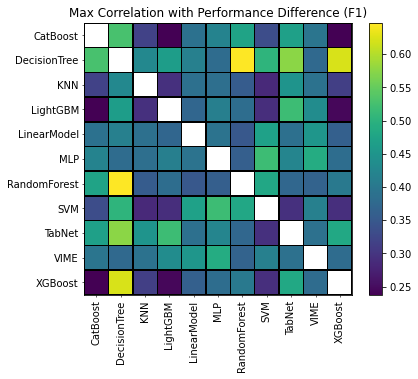

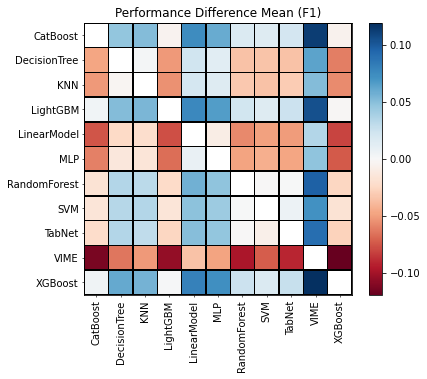

In [16]:
show_metric_corr_results("F1")

,CatBoost,DecisionTree,KNN,LightGBM,LinearModel,MLP,RandomForest,SVM,TabNet,VIME,XGBoost
CatBoost,NaN,statistical.nr_disc,general.freq_class.kurtosis,statistical.sd.histogram.4,general.freq_class.kurtosis,statistical.can_cor.histogram.3,statistical.nr_disc,statistical.max.histogram.0,info-theory.mut_inf.min,general.freq_class.median,general.freq_class.kurtosis
DecisionTree,statistical.nr_disc,NaN,general.freq_class.count,info-theory.class_ent,info-theory.class_ent,statistical.h_mean.count,info-theory.class_ent,info-theory.class_ent,info-theory.class_ent,statistical.cov.count,info-theory.class_ent
KNN,general.freq_class.kurtosis,general.freq_class.count,NaN,info-theory.class_conc.iq_range,statistical.min.histogram.4,statistical.can_cor.histogram.3,general.freq_class.skewness,general.freq_class.histogram.1,general.freq_class.count,general.freq_class.histogram.1,general.freq_class.skewness
LightGBM,statistical.sd.histogram.4,info-theory.class_ent,info-theory.class_conc.iq_range,NaN,statistical.min.histogram.4,statistical.can_cor.histogram.3,info-theory.class_ent,statistical.skewness.quantiles.4,info-theory.mut_inf.min,general.freq_class.histogram.1,info-theory.class_conc.iq_range
LinearModel,general.freq_class.kurtosis,info-theory.class_ent,statistical.min.histogram.4,statistical.min.histogram.4,NaN,statistical.cov.count,statistical.min.histogram.4,statistical.min.histogram.4,info-theory.joint_ent.histogram.0,statistical.cov.count,statistical.min.histogram.4
MLP,statistical.can_cor.histogram.3,statistical.h_mean.count,statistical.can_cor.histogram.3,statistical.can_cor.histogram.3,statistical.cov.count,NaN,statistical.h_mean.count,statistical.can_cor.histogram.3,general.nr_class,statistical.skewness.range,statistical.h_mean.count
RandomForest,statistical.nr_disc,info-theory.class_ent,general.freq_class.skewness,info-theory.class_ent,statistical.min.histogram.4,statistical.h_mean.count,NaN,statistical.w_lambda,statistical.nr_disc,statistical.cov.count,general.nr_class
SVM,statistical.max.histogram.0,info-theory.class_ent,general.freq_class.histogram.1,statistical.skewness.quantiles.4,statistical.min.histogram.4,statistical.can_cor.histogram.3,statistical.w_lambda,NaN,info-theory.mut_inf.min,general.freq_class.histogram.1,general.freq_class.histogram.1
TabNet,info-theory.mut_inf.min,info-theory.class_ent,general.freq_class.count,info-theory.mut_inf.min,info-theory.joint_ent.histogram.0,general.nr_class,statistical.nr_disc,info-theory.mut_inf.min,NaN,statistical.cov.count,info-theory.mut_inf.quantiles.0
VIME,general.freq_class.median,statistical.cov.count,general.freq_class.histogram.1,general.freq_class.histogram.1,statistical.cov.count,statistical.skewness.range,statistical.cov.count,general.freq_class.histogram.1,statistical.cov.count,NaN,statistical.cor.count


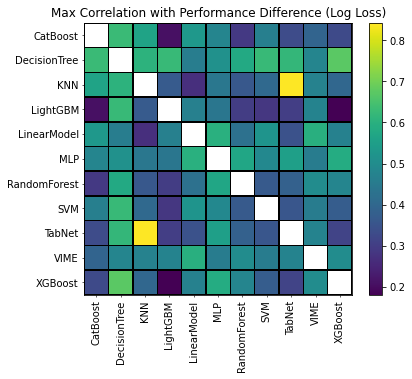

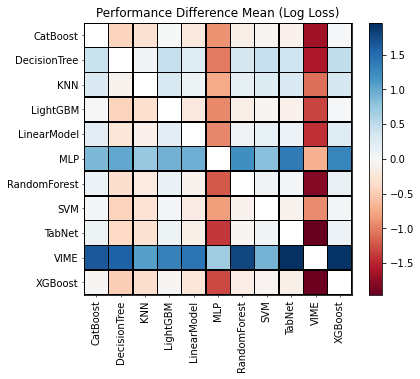

In [17]:
show_metric_corr_results("Log Loss")

,CatBoost,DecisionTree,KNN,LightGBM,LinearModel,MLP,RandomForest,SVM,TabNet,VIME,XGBoost
CatBoost,NaN,statistical.nr_disc,statistical.iq_range.histogram.0,statistical.min.histogram.2,statistical.can_cor.skewness,info-theory.mut_inf.quantiles.3,statistical.t_mean.histogram.5,statistical.cor.skewness,statistical.g_mean.quantiles.1,statistical.skewness.range,statistical.min.histogram.2
DecisionTree,statistical.nr_disc,NaN,statistical.max.histogram.0,info-theory.class_ent,statistical.p_trace,statistical.max.histogram.0,statistical.nr_disc,info-theory.class_ent,statistical.nr_disc,statistical.skewness.range,statistical.nr_disc
KNN,statistical.iq_range.histogram.0,statistical.max.histogram.0,NaN,statistical.median.histogram.0,statistical.min.histogram.8,statistical.t_mean.quantiles.1,statistical.iq_range.histogram.0,info-theory.joint_ent.histogram.9,statistical.g_mean.median,statistical.skewness.min,statistical.mean.histogram.0
LightGBM,statistical.min.histogram.2,info-theory.class_ent,statistical.median.histogram.0,NaN,info-theory.attr_conc.histogram.9,general.freq_class.histogram.1,statistical.t_mean.histogram.5,statistical.cor.skewness,statistical.h_mean.quantiles.1,general.freq_class.histogram.1,statistical.t_mean.kurtosis
LinearModel,statistical.can_cor.skewness,statistical.p_trace,statistical.min.histogram.8,info-theory.attr_conc.histogram.9,NaN,info-theory.mut_inf.max,statistical.can_cor.quantiles.1,statistical.can_cor.range,info-theory.attr_ent.histogram.9,general.freq_class.histogram.1,statistical.can_cor.skewness
MLP,info-theory.mut_inf.quantiles.3,statistical.max.histogram.0,statistical.t_mean.quantiles.1,general.freq_class.histogram.1,info-theory.mut_inf.max,NaN,info-theory.mut_inf.quantiles.3,statistical.can_cor.range,info-theory.class_ent,statistical.skewness.range,general.freq_class.count
RandomForest,statistical.t_mean.histogram.5,statistical.nr_disc,statistical.iq_range.histogram.0,statistical.t_mean.histogram.5,statistical.can_cor.quantiles.1,info-theory.mut_inf.quantiles.3,NaN,general.freq_class.histogram.3,statistical.kurtosis.mean,statistical.skewness.range,statistical.t_mean.histogram.5
SVM,statistical.cor.skewness,info-theory.class_ent,info-theory.joint_ent.histogram.9,statistical.cor.skewness,statistical.can_cor.range,statistical.can_cor.range,general.freq_class.histogram.3,NaN,info-theory.class_conc.min,general.freq_class.quantiles.2,statistical.cor.skewness
TabNet,statistical.g_mean.quantiles.1,statistical.nr_disc,statistical.g_mean.median,statistical.h_mean.quantiles.1,info-theory.attr_ent.histogram.9,info-theory.class_ent,statistical.kurtosis.mean,info-theory.class_conc.min,NaN,statistical.sparsity.skewness,statistical.max.quantiles.0
VIME,statistical.skewness.range,statistical.skewness.range,statistical.skewness.min,general.freq_class.histogram.1,general.freq_class.histogram.1,statistical.skewness.range,statistical.skewness.range,general.freq_class.quantiles.2,statistical.sparsity.skewness,NaN,statistical.skewness.range


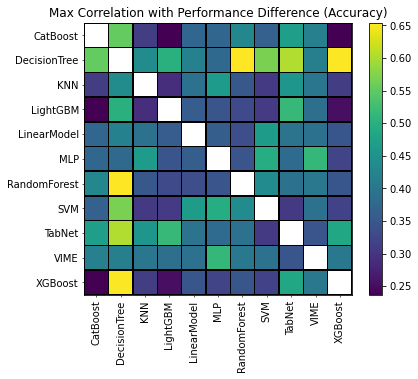

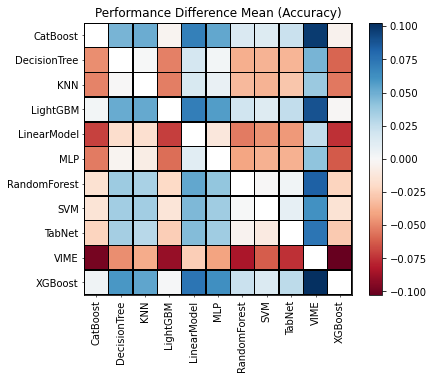

In [18]:
show_metric_corr_results("Accuracy")

In [55]:
max_corrs["F1"].sort_index()

max_corr   max_abs  \
CatBoost    KNN          0.318725  0.318725   
            LinearModel  0.390346  0.390346   
            MLP          0.420426  0.420426   
            SVM          0.610234  0.610234   
            TabNet       0.466354  0.466354   
            XGBoost     -0.237729  0.237729   
KNN         CatBoost     0.318725  0.318725   
            LinearModel  0.386802  0.386802   
            MLP          0.385026  0.385026   
            SVM         -0.330228  0.330228   
            TabNet      -0.392273  0.392273   
            XGBoost     -0.313255  0.313255   
LinearModel CatBoost     0.390346  0.390346   
            KNN          0.386802  0.386802   
            MLP          0.393137  0.393137   
            SVM         -0.476101  0.476101   
            TabNet      -0.474724  0.474724   
            XGBoost     -0.361431  0.361431   
MLP         CatBoost     0.420426  0.420426   
            KNN          0.385026  0.385026   
            LinearModel  0.393137  0.393137   
            SVM         -0.465290  0.465290   
            TabNet      -0.509076  0.509076   
            XGBoost     -0.382080  0.382080   
SVM         CatBoost     0.610234  0.610234   
            KNN         -0.330228  0.330228   
            LinearModel -0.476101  0.476101   
            MLP         -0.465290  0.465290   
            TabNet      -0.632648  0.632648   
            XGBoost     -0.606159  0.606159   
TabNet      CatBoost     0.466354  0.466354   
            KNN         -0.392273  0.392273   
            LinearModel -0.474724  0.474724   
            MLP         -0.509076  0.509076   
            SVM         -0.632648  0.632648   
            XGBoost     -0.420872  0.420872   
XGBoost     CatBoost    -0.237729  0.237729   
            KNN         -0.313255  0.313255   
            LinearModel -0.361431  0.361431   
            MLP         -0.382080  0.382080   
            SVM         -0.606159  0.606159   
            TabNet      -0.420872  0.420872   

                                                        metafeature  
CatBoost    KNN               f__pymfe.statistical.mean.histogram.0  
            LinearModel       f__pymfe.statistical.can_cor.skewness  
            MLP             f__pymfe.general.freq_class.histogram.1  
            SVM                      f__pymfe.statistical.median.sd  
            TabNet                f__pymfe.statistical.cor.skewness  
            XGBoost            f__pymfe.statistical.min.histogram.2  
KNN         CatBoost          f__pymfe.statistical.mean.histogram.0  
            LinearModel        f__pymfe.statistical.min.histogram.8  
            MLP             f__pymfe.general.freq_class.histogram.1  
            SVM          f__pymfe.info-theory.joint_ent.histogram.9  
            TabNet                      f__pymfe.statistical.mad.sd  
            XGBoost           f__pymfe.statistical.mean.histogram.0  
LinearModel CatBoost          f__pymfe.statistical.can_cor.skewness  
            KNN                f__pymfe.statistical.min.histogram.8  
            MLP                f__pymfe.info-theory.class_conc.mean  
            SVM          f__pymfe.info-theory.attr_conc.histogram.9  
            TabNet          f__pymfe.general.freq_class.histogram.2  
            XGBoost           f__pymfe.statistical.can_cor.skewness  
MLP         CatBoost        f__pymfe.general.freq_class.histogram.1  
            KNN             f__pymfe.general.freq_class.histogram.1  
            LinearModel        f__pymfe.info-theory.class_conc.mean  
            SVM                  f__pymfe.statistical.can_cor.range  
            TabNet             f__pymfe.statistical.mad.quantiles.4  
            XGBoost                       f__pymfe.general.nr_class  
SVM         CatBoost                 f__pymfe.statistical.median.sd  
            KNN          f__pymfe.info-theory.joint_ent.histogram.9  
            LinearModel  f__pymfe.info-theory.attr_conc.histogram.9  
            MLP                  f__pymfe.s

In [19]:
max_corrs["Log Loss"].sort_index()

max_corr   max_abs  \
CatBoost DecisionTree -0.629110  0.629110   
         KNN          -0.563202  0.563202   
         LightGBM      0.206881  0.206881   
         LinearModel  -0.533854  0.533854   
         MLP          -0.481899  0.481899   
...                         ...       ...   
XGBoost  MLP           0.588060  0.588060   
         RandomForest  0.480626  0.480626   
         SVM           0.372354  0.372354   
         TabNet        0.314709  0.314709   
         VIME          0.500930  0.500930   

                                                    metafeature  
CatBoost DecisionTree              f__pymfe.statistical.nr_disc  
         KNN               f__pymfe.general.freq_class.kurtosis  
         LightGBM           f__pymfe.statistical.sd.histogram.4  
         LinearModel       f__pymfe.general.freq_class.kurtosis  
         MLP           f__pymfe.statistical.can_cor.histogram.3  
...                                                         ...  
XGBoost  MLP                  f__pymfe.statistical.h_mean.count  
         RandomForest                 f__pymfe.general.nr_class  
         SVM            f__pymfe.general.freq_class.histogram.1  
         TabNet        f__pymfe.info-theory.mut_inf.quantiles.0  
         VIME                    f__pymfe.statistical.cor.count  

[110 rows x 3 columns]

In [20]:
max_corrs["Accuracy"].sort_index()

max_corr   max_abs  \
CatBoost DecisionTree  0.553198  0.553198   
         KNN           0.311004  0.311004   
         LightGBM     -0.237643  0.237643   
         LinearModel   0.373723  0.373723   
         MLP           0.374507  0.374507   
...                         ...       ...   
XGBoost  MLP          -0.321305  0.321305   
         RandomForest -0.348339  0.348339   
         SVM          -0.319526  0.319526   
         TabNet       -0.484738  0.484738   
         VIME         -0.403855  0.403855   

                                                     metafeature  
CatBoost DecisionTree               f__pymfe.statistical.nr_disc  
         KNN           f__pymfe.statistical.iq_range.histogram.0  
         LightGBM           f__pymfe.statistical.min.histogram.2  
         LinearModel       f__pymfe.statistical.can_cor.skewness  
         MLP            f__pymfe.info-theory.mut_inf.quantiles.3  
...                                                          ...  
XGBoost  MLP                   f__pymfe.general.freq_class.count  
         RandomForest    f__pymfe.statistical.t_mean.histogram.5  
         SVM                   f__pymfe.statistical.cor.skewness  
         TabNet             f__pymfe.statistical.max.quantiles.0  
         VIME                f__pymfe.statistical.skewness.range  

[110 rows x 3 columns]

In [21]:
all_pair_corrs["F1"]

,f__pymfe.statistical.nr_disc,f__pymfe.statistical.can_cor.count,f__pymfe.info-theory.class_ent,f__pymfe.statistical.mad.histogram.5,f__pymfe.statistical.p_trace,f__pymfe.statistical.median.histogram.5,f__pymfe.general.freq_class.histogram.3,f__pymfe.statistical.t_mean.histogram.5,f__pymfe.statistical.can_cor.histogram.7,f__pymfe.general.freq_class.count,...,f__pymfe.general.freq_class.median,f__pymfe.general.freq_class.quantiles.2,f__pymfe.general.freq_class.mean,f__pymfe.statistical.can_cor.histogram.5,f__pymfe.general.freq_class.histogram.0,f__pymfe.general.freq_class.quantiles.3,f__pymfe.general.freq_class.quantiles.4,f__pymfe.general.freq_class.max,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
CatBoost-DecisionTree,0.527199,0.526589,0.496500,0.479473,0.468496,0.439858,0.415959,0.405863,0.404852,0.391095,...,-0.442696,-0.442696,-0.462829,-0.464681,-0.465130,-0.480206,-0.498773,-0.498773,NaN,NaN
CatBoost-KNN,-0.063815,-0.071204,0.007121,-0.108806,-0.092389,-0.099677,-0.037601,-0.092548,-0.039726,-0.009983,...,-0.067533,-0.067533,-0.031056,0.001620,0.077634,-0.076885,-0.050340,-0.050340,NaN,NaN
CatBoost-LightGBM,-0.054481,-0.046304,-0.089006,0.046214,0.037987,0.062976,-0.095396,-0.026775,-0.016851,-0.059364,...,0.124019,0.124019,0.118973,0.099024,-0.000589,0.111807,0.099200,0.099200,NaN,NaN
CatBoost-LinearModel,0.073318,0.066919,0.084766,-0.151712,-0.145926,-0.072140,-0.088911,-0.043023,-0.116728,0.033459,...,-0.151017,-0.151017,-0.120470,-0.156057,-0.089591,-0.138226,-0.123204,-0.123204,NaN,NaN
CatBoost-MLP,0.112961,0.105951,0.241213,-0.151020,-0.020882,-0.119184,-0.030713,-0.031159,0.020661,0.273016,...,-0.283216,-0.283216,-0.251735,-0.121642,-0.122539,-0.271567,-0.217750,-0.217750,NaN,NaN
CatBoost-RandomForest,0.108499,0.109299,0.071458,0.346735,0.072859,0.415149,0.426594,0.475367,0.177962,0.057247,...,-0.092518,-0.092518,-0.082921,-0.108756,-0.158038,-0.097103,-0.087017,-0.087017,NaN,NaN
CatBoost-SVM,-0.229167,-0.223396,-0.213811,-0.201398,-0.262327,-0.183812,-0.099921,-0.086025,-0.245012,-0.179427,...,0.153179,0.153179,0.195259,0.227777,0.226484,0.171105,0.196268,0.196268,NaN,NaN
CatBoost-TabNet,-0.119889,-0.108694,-0.127416,-0.028162,-0.113106,-0.029946,-0.069328,0.058454,-0.100715,-0.091249,...,0.130157,0.130157,0.145363,0.128680,0.177299,0.080899,0.092898,0.092898,NaN,NaN
CatBoost-VIME,0.182036,0.169278,0.295731,-0.140408,0.163802,-0.100507,-0.006782,-0.069698,0.183537,0.275055,...,-0.370004,-0.370004,-0.341117,-0.193949,-0.219718,-0.352645,-0.280524,-0.280524,NaN,NaN
CatBoost-XGBoost,-0.090459,-0.082406,-0.131069,0.003152,-0.037968,0.015604,-0.124596,-0.051866,-0.079987,-0.082751,...,0.174473,0.174473,0.160581,0.133761,0.022457,0.161624,0.141214,0.141214,NaN,NaN


In [22]:
all_pair_corrs["F1"].max(axis=1)

CatBoost-DecisionTree        0.527199
CatBoost-KNN                 0.318725
CatBoost-LightGBM            0.224764
CatBoost-LinearModel         0.390346
CatBoost-MLP                 0.420426
CatBoost-RandomForest        0.475367
CatBoost-SVM                 0.333013
CatBoost-TabNet              0.467916
CatBoost-VIME                0.396355
CatBoost-XGBoost             0.177531
DecisionTree-KNN             0.428938
DecisionTree-LightGBM        0.460097
DecisionTree-LinearModel     0.336048
DecisionTree-MLP             0.380240
DecisionTree-RandomForest    0.562041
DecisionTree-SVM             0.496305
DecisionTree-TabNet          0.496872
DecisionTree-VIME            0.376703
DecisionTree-XGBoost         0.537730
KNN-LightGBM                 0.227809
KNN-LinearModel              0.386802
KNN-MLP                      0.385026
KNN-RandomForest             0.343213
KNN-SVM                      0.249107
KNN-TabNet                   0.449391
KNN-VIME                     0.392624
KNN-XGBoost 